<p style="color: blue; font-size: 30px; text-align: left; width: 150px; margin-right: 30px;">BlueshiftAcademy</p>
<p style="color: whit; font-size: 14px; text-align: left; width: 130px; margin-right: 30px;">Quinta-Feira, 10/10/2024</p>
<h2 style="text-align: center;">Thiago Costa Santana</h2>

<h1 align="center">Case 1- Python</h1>


<br>
<br>

### 1. Distribuição de Renda por Estado (UF): Analisar a média e a mediana de renda por estado para identificar onde se concentram clientes com maior poder aquisitivo.

<br>

In [3]:
import pandas as pd

In [5]:
df1 = pd.read_csv(r"C:\Users\BlueShift\Downloads\Dataset.csv")

In [7]:
df1.head()

,Nome,Sobrenome,Email,UF,Cidade,Genero,Renda Média,Escolaridade,Estado Civil
0,Sergio,Costa,eduardo.oliveira@exemplo.com,DF,Brasília,Masculino,R$ 6.001 - R$ 8.000,Ensino Superior,Viúvo(a)
1,Eduardo,Melo,quintino.melo@exemplo.com,PE,Recife,Masculino,R$ 6.001 - R$ 8.000,Doutorado,Divorciado(a)
2,Sergio,Pereira,olivia.freitas@exemplo.com,CE,Fortaleza,Feminino,R$ 2.001 - R$ 4.000,Ensino Médio,Solteiro(a)
3,Gustavo,Oliveira,gustavo.melo@exemplo.com,SP,São Paulo,Feminino,R$ 2.001 - R$ 4.000,Doutorado,Viúvo(a)
4,Juliana,Oliveira,carlos.almeida@exemplo.com,DF,Brasília,Masculino,Acima de R$ 10.000,Ensino Superior,Divorciado(a)


### O que está sendo utilizado na função
- Função chamada calcular_media_renda, que recebe um argumento renda. Esta função será usada para converter valores de renda em um valor médio.
- Replace, Remove o símbolo R$ e os espaços da string de renda, para preparar a string para operações numéricas.
- String contém a frase "Acima de". Se sim, retorna um valor fixo de 10000, presumivelmente representando o valor mínimo para rendas acima desse valor
- Se a string contém um intervalo (indicada pelo caractere -), divide a string em dois valores (mínimo e máximo).
- Calcular_media_renda a cada valor da coluna 'Renda Média' do DataFrame df1 usando o método apply. O resultado é uma nova coluna chamada 'Renda Media Calculada'.
- df1.groupby('UF'): Agrupa o DataFrame por estado (coluna 'UF'), mean(): Calcula a média das rendas para cada estado, median(): Calcula a mediana das rendas para cada estado.
- Resultados são armazenados nas variáveis media_por_estado e mediana_por_estado

In [9]:
import pandas as pd
import numpy as np
from IPython.display import display

# Função para calcular a renda média
def calcular_media_renda(renda):
    # Limpeza básica da string de renda
    renda = renda.replace('R$', '').replace(' ', '')
    
    # Caso "Acima de"
    if 'Acima de' in renda:
        return 10000  
    
    # Caso de intervalos de valores
    if '-' in renda:
        try:
            valores = renda.split('-')
            min_valor = int(valores[0].replace('.', ''))
            max_valor = int(valores[1].replace('.', ''))
            return (min_valor + max_valor) / 2  # Calcula a média dos dois valores
        except ValueError:
            return None  # Caso de erro na conversão, retorna None
    
   
# Aplicar a função de cálculo da renda ao DataFrame
df1['Renda Media Calculada'] = df1['Renda Média'].apply(calcular_media_renda)

# Agrupando por estado (UF) e calculando a média e a mediana
media_por_estado = df1.groupby('UF')['Renda Media Calculada'].mean()
mediana_por_estado = df1.groupby('UF')['Renda Media Calculada'].median()

# Criar um DataFrame com as informações de média e mediana, arredondando e convertendo para inteiros
df_resultado = pd.DataFrame({
    'UF': media_por_estado.index,
    'Renda Média': media_por_estado.values.round(0).astype(int),  # Arredondar e converter para inteiros
    'Renda Mediana': mediana_por_estado.values.round(0).astype(int)  # Arredondar e converter para inteiros
})

# Exibindo os resultados no modo display
display(df_resultado)


,UF,Renda Média,Renda Mediana
0,AM,5839,7000
1,BA,5834,5000
2,CE,5055,5000
3,DF,5193,5000
4,GO,5432,5000
5,MA,5456,5000
6,MG,5359,5000
7,MS,5187,5000
8,PA,4977,5000
9,PE,5756,7000


### 1.1 Segmentação de Clientes por Estado Civil e Gênero: Identificar a proporção de clientes casados, solteiros e divorciados por gênero e gerar gráficos comparativos. Essa análise pode ajudar a segmentar melhor campanhas direcionadas.

<br>

### O que está sendo utilizado no programa
-  Biblioteca de visualização gráfica usada para criar gráficos, matplotlib.pyplot e seaborn gráficos e visualizações com estilo aprimorado.
-  df1.groupby(['Genero', 'Estado Civil']): Agrupa os dados do DataFrame df1 pelas colunas 'Genero' e 'Estado Civil', para que possamos calcular a quantidade de clientes em cada combinação dessas categorias.
- size(): Conta o número de ocorrências para cada combinação de 'Genero' e 'Estado Civil'.
- unstack(fill_value=0): Transforma os resultados do agrupamento em uma tabela de formato mais legível, com os estados civis como colunas. O parâmetro fill_value=0 preenche as células vazias com 0.

<Figure size 1000x600 with 0 Axes>

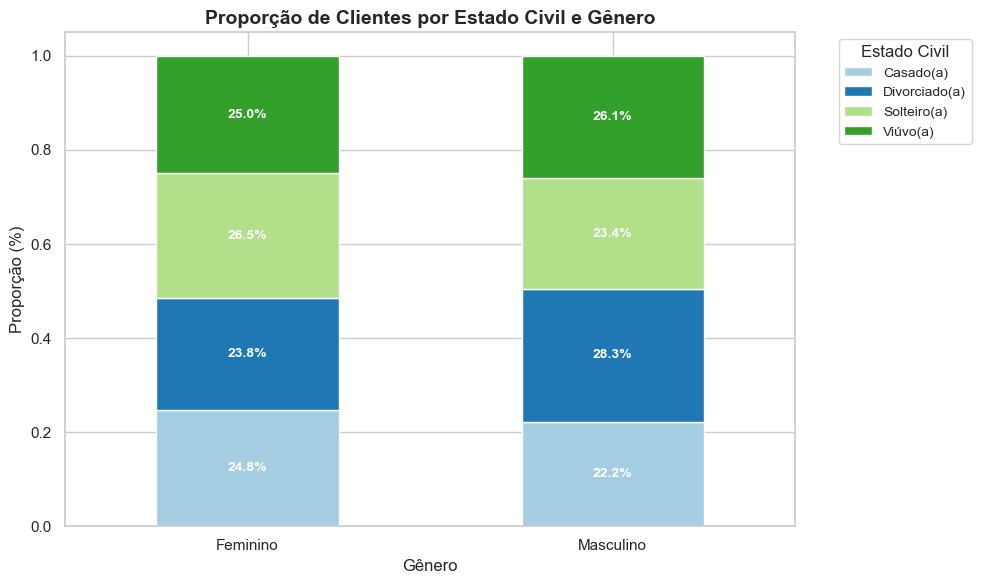

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular proporções por gênero e estado civil
proporcoes = df1.groupby(['Genero', 'Estado Civil']).size().unstack(fill_value=0)
proporcoes = proporcoes.div(proporcoes.sum(axis=1), axis=0)  # Calcular proporções
proporcoes = proporcoes.reset_index()

# Configurações gerais do gráfico
plt.figure(figsize=(10, 6))  # Aumentar o tamanho da figura
sns.set_theme(style="whitegrid")  # Usar um estilo mais moderno e clean

# Plotando gráfico de barras empilhadas
ax = proporcoes.set_index('Genero').plot(kind='bar', stacked=True, color=sns.color_palette("Paired", len(proporcoes.columns)), figsize=(10, 6))

# Adicionando rótulos de percentual em cada barra
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.text(x + width / 2, y + height / 2, f'{height:.1%}', ha='center', va='center', color='white', fontsize=10, fontweight='bold')

# Títulos e legendas
plt.title('Proporção de Clientes por Estado Civil e Gênero', fontsize=14, fontweight='bold')
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Proporção (%)', fontsize=12)  # Se a proporção estiver em %, ajuste o rótulo
plt.xticks(rotation=0)  # Mantém os rótulos "Feminino" e "Masculino" na horizontal
plt.legend(title='Estado Civil', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1, fontsize=10)  # Legenda ajustada

# Exibir gráfico
plt.tight_layout()  # Ajustar layout para evitar sobreposição
plt.show()


print('-='*50)

### 2. Distribuição Geográfica dos Clientes: Criar um mapa de calor para visualizar a concentração de clientes em diferentes cidades e estados, permitindo identificar regiões com maior presença.

<br>

### O que está sendo utilizado na função
- Pandas: Manipulação de dados.
- Folium: Criação de mapas interativos.
- Nominatim (geopy): Serviço de geolocalização que converte endereços em coordenadas.
- HeatMap (folium.plugins): Criação de mapas de calor.
- time, random, concurrent.futures: Controle de tempo, geração de números aleatórios e paralelismo.
- def get_coordinates, verifica se as coordenadas da cidade já estão no cache
- for _ in range(max_retries), Tenta obter coordenadas até max_retries (padrão 5). Se encontrar, armazena no cache e retorna.
- except GeocoderTimedOutEm caso de timeout, aguarda entre 2 a 3 segundos. Para erros 403 e 503, aguarda de 5 a 10 segundos.
- def add_coordinates_parallel(df), ThreadPoolExecutor: Executa a função get_coordinates em paralelo para várias cidades ao mesmo tempo (10 threads).
- future_to_city: Mapeia a cidade e a função enviada para execução.
- as_completed: Retorna os resultados à medida que as threads finalizam.
- df1['Coordenadas'] = add_coordinates_parallel(df1), Aplica a função para obter coordenadas e adiciona ao DataFrame df1
- df_validas = df1.dropna(subset=['Coordenadas']), Filtrar cidades com coordenadas válidas remove linhas onde as coordenadas não foram obtidas (valores NaN).
- Criação do mapa base e adição do HeatMap



In [8]:
!pip install folium geopy

  Using cached geopy-2.4.1-py3-none-any.whl.metadata (6.8 kB)
  Using cached geographiclib-2.0-py3-none-any.whl.metadata (1.4 kB)
Using cached geopy-2.4.1-py3-none-any.whl (125 kB)
Using cached geographiclib-2.0-py3-none-any.whl (40 kB)


In [4]:
!pip install folium


  Using cached folium-0.17.0-py2.py3-none-any.whl.metadata (3.8 kB)
  Using cached branca-0.8.0-py3-none-any.whl.metadata (1.5 kB)
Using cached folium-0.17.0-py2.py3-none-any.whl (108 kB)
Using cached branca-0.8.0-py3-none-any.whl (25 kB)


In [93]:
import pandas as pd
import folium
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from folium.plugins import HeatMap
import time
import random
import concurrent.futures

# Função para obter as coordenadas de uma cidade com múltiplas tentativas
geolocator = Nominatim(user_agent="geoapiExercises", timeout=20)
cache = {}

def get_coordinates(cidade, max_retries=5):
    """Obtém coordenadas da cidade com múltiplas tentativas."""
    if cidade in cache:
        return cache[cidade]
    
    for _ in range(max_retries):
        try:
            location = geolocator.geocode(cidade)
            if location:
                coord = (location.latitude, location.longitude)
                cache[cidade] = coord
                return coord
            print(f"Coordenadas não encontradas para {cidade}")
            return None
        except GeocoderTimedOut:
            time.sleep(2 + random.uniform(1, 3))
        except Exception as e:
            if '403' in str(e) or '503' in str(e):
                time.sleep(5 + random.uniform(1, 5))
            else:
                print(f"Erro ao obter coordenadas para {cidade}: {e}")
                return None
    return None

def add_coordinates_parallel(df):
    """Adiciona coordenadas ao DataFrame usando múltiplas threads."""
    with concurrent.futures.ThreadPoolExecutor(max_workers=10) as executor:
        future_to_city = {executor.submit(get_coordinates, row['Cidade']): row for i, row in df.iterrows()}
        return [future.result() for future in concurrent.futures.as_completed(future_to_city)]

# Adicionar coordenadas ao DataFrame
df1['Coordenadas'] = add_coordinates_parallel(df1)

# Filtrar cidades com coordenadas válidas
df_validas = df1.dropna(subset=['Coordenadas'])

# Criar o mapa base centralizado no Brasil
mapa = folium.Map(location=[-15.788497, -47.879873], zoom_start=4)

# Criar lista de coordenadas para o HeatMap
coordenadas = [list(coord) for coord in df_validas['Coordenadas'] if coord]

# Adicionar HeatMap ao mapa com cores mais fortes
if coordenadas:
    HeatMap(coordenadas, radius=30, blur=15, max_zoom=1, min_opacity=0.5, gradient={0: 'blue', 0.5: 'lime', 1: 'red'}).add_to(mapa)

# Adicionar marcadores de cidades para referência
for coord in coordenadas:
    folium.Marker(location=coord, icon=folium.Icon(color='blue')).add_to(mapa)

# Adicionar título ao mapa
title_html = '''
     <h3 align="center" style="font-size:20px"><b>Mapa de Calor de Cidades</b></h3>
'''
mapa.get_root().html.add_child(folium.Element(title_html))

# Adicionar legenda com estilo
legend_html = '''
     <div style="position: fixed; 
                  bottom: 40px; left: 30px; width: 300px; height: 120px; 
                  background-color: white; opacity: .9; z-index: 9999; 
                  border: 2px solid black; padding: 10px;">
         <h4 style="text-align: center;">Legenda do Mapa</h4>
         <p><b>Cores mais quentes:</b> Alta concentração</p>
         <p><b>Cores intermediárias:</b> Média concentração</p>
         <p><b>Cores mais frias:</b> Baixa concentração</p>
     </div>
'''
mapa.get_root().html.add_child(folium.Element(legend_html))

# Exibir o mapa no Jupyter Notebook
mapa


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


### 3. Análise de Outliers de Renda: Identificar clientes com renda muito superior ou inferior à média para entender padrões atípicos que possam indicar perfis de clientes fora do usual para o negócio.

<br>

### O que está sendo utilizado na função
- Limpeza e conversão da coluna de renda, tr.replace: Remove o símbolo de "R$" e outros caracteres não numéricos, deixando apenas números e o traço (usado para intervalos de renda).
- Função para calcular a renda média, row: Recebe um valor de renda, que pode ser um número único ou um intervalo, if '-' in row: Verifica se há um intervalo (ex.: "3000-5000"), map(int, row.split('-')): Separa o intervalo e converte os valores mínimo e máximo em inteiros,round: Calcula a média do intervalo e arredonda para o inteiro mais próximo, se for um valor único, converte o número diretamente e arredonda.
- Aplicação da função para calcular a renda média, apply: Aplica a função calcular_media_renda a cada valor da coluna Renda Media Limpa, criando a nova coluna Renda Media Calculada
- Agrupamento por estado e cálculo da média, groupby('UF'): Agrupa os dados por estado (coluna "UF").
mean(): Calcula a renda média para cada estado com base na coluna Renda Media Calculada
- Categorização da renda, np.where: Função condicional de numpy para categorização, df1['UF'].map(media_por_estado): Mapeia a média de renda por estado e compara com a renda calculada, se for maior que a média, retorna "Acima da Média"., se for menor, retorna "Abaixo da Média".
Caso contrário, retorna "Na Média".
- Função para identificar outliers, quantile(0.25): Calcula o 1º quartil (Q1) da coluna.
quantile(0.75): Calcula o 3º quartil (Q3).
IQR: Intervalo interquartil (Q3 - Q1), usado para determinar a dispersão dos dados.
limite_inferior e limite_superior: Define os limites valores fora desse intervalo são considerados outliers.
df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]: Filtra os outliers, retornando linhas que estão abaixo ou acima dos limites.

In [81]:
import pandas as pd
import numpy as np
from IPython.display import display

# Limpeza e conversão da coluna de renda diretamente com pandas
df1['Renda Media Limpa'] = df1['Renda Média'].str.replace(r'R\$', '', regex=True).str.replace(r'[^0-9\-]', '', regex=True)

# Função para calcular a renda média em casos de intervalo
def calcular_media_renda(row):
    if '-' in row:
        min_valor, max_valor = map(int, row.split('-'))
        return int(round((min_valor + max_valor) / 2))  # Arredondar e converter para int
    return int(round(int(row)))  # Arredondar e converter para int

# Aplicar a função para calcular a renda média
df1['Renda Media Calculada'] = df1['Renda Media Limpa'].apply(calcular_media_renda)

# Agrupar por estado (UF) e calcular a média
media_por_estado = df1.groupby('UF')['Renda Media Calculada'].mean()

# Categorização da renda em relação à média por estado
df1['Categoria Renda'] = np.where(
    df1['Renda Media Calculada'] > df1['UF'].map(media_por_estado), 
    'Acima da Média', 
    np.where(df1['Renda Media Calculada'] < df1['UF'].map(media_por_estado), 'Abaixo da Média', 'Na Média')
)

# Função para identificar outliers
def identificar_outliers(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]

# Identificar outliers na renda calculada
outliers = identificar_outliers(df1, 'Renda Media Calculada')

# Ajustar o formato da coluna 'Renda Média'
df1['Renda Média'] = df1['Renda Média'].str.replace(r'R\$', '', regex=True).str.strip()

# Exibir DataFrame com as categorias de renda
display(df1[['UF', 'Renda Média', 'Renda Media Calculada', 'Categoria Renda']])

# Exibir outliers, se houver
if not outliers.empty:
    display("Outliers encontrados:", outliers)
else:
    display("Nenhum outlier encontrado.")

print('-=' * 50)


,UF,Renda Média,Renda Media Calculada,Categoria Renda
0,DF,6.001 - 8.000,7000,Acima da Média
1,PE,6.001 - 8.000,7000,Acima da Média
2,CE,2.001 - 4.000,3000,Abaixo da Média
3,SP,2.001 - 4.000,3000,Abaixo da Média
4,DF,Acima de 10.000,10000,Acima da Média
...,...,...,...,...
995,GO,2.001 - 4.000,3000,Abaixo da Média
996,PI,Acima de 10.000,10000,Acima da Média
997,TO,4.001 - 6.000,5000,Abaixo da Média
998,RN,2.001 - 4.000,3000,Abaixo da Média


'Nenhum outlier encontrado.'

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


### 4. Correlação entre Renda e Estado Civil: Avaliar a correlação entre estado civil e renda média, verificando se existe algum padrão que ajude a imobiliária a personalizar suas ofertas.

<br>

### O que está sendo utilizado na função
- Limpeza e conversão da coluna de renda
- Função para calcular a média de renda em casos de intervalo
- Aplicação da função de cálculo
- grupamento por estado civil e cálculo da média de renda
- Arredondamento dos valores da média de renda
- Exibição Gráfico

,Estado Civil,Renda Media Calculada
0,Casado(a),6091
1,Divorciado(a),5883
2,Solteiro(a),6000
3,Viúvo(a),6271


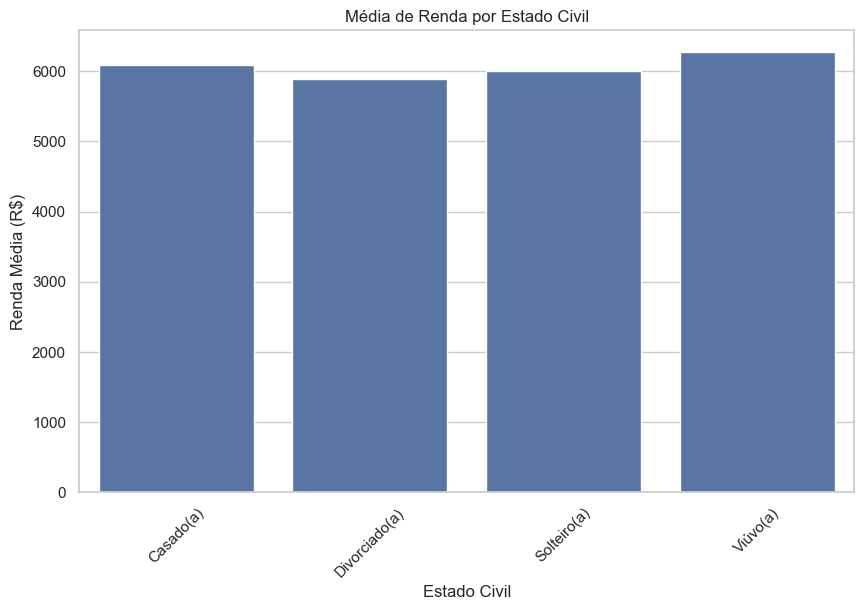

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Limpeza e conversão da coluna de renda diretamente com pandas
df1['Renda Media Limpa'] = df1['Renda Média'].str.replace(r'R\$', '', regex=True).str.replace(r'[^0-9\-]', '', regex=True)

# Função para calcular a renda média em casos de intervalo
def calcular_media_renda(row):
    if '-' in row:
        min_valor, max_valor = map(int, row.split('-'))
        return round((min_valor + max_valor) / 2)  # Arredondar para o inteiro mais próximo
    return round(int(row))  # Arredondar para o inteiro mais próximo

# Aplicar a função para calcular a renda média
df1['Renda Media Calculada'] = df1['Renda Media Limpa'].apply(calcular_media_renda)

# Agrupar por estado civil e calcular a média de renda
media_renda_por_estado_civil = df1.groupby('Estado Civil')['Renda Media Calculada'].mean().reset_index()

# Arredondar os valores da média de renda
media_renda_por_estado_civil['Renda Media Calculada'] = media_renda_por_estado_civil['Renda Media Calculada'].round(0).astype(int)

# Exibir a média de renda por estado civil
display(media_renda_por_estado_civil)

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Estado Civil', y='Renda Media Calculada', data=media_renda_por_estado_civil)
plt.title('Média de Renda por Estado Civil')
plt.ylabel('Renda Média (R$)')
plt.xlabel('Estado Civil')
plt.xticks(rotation=45)
plt.show()

print('-=' * 50)
